PRINCIPAL COPONENT ANALYSIS

*   Import Numpy module for mathematicsl calulations
*   Import Pandas for Data Pre-processing
*   Import Matplotlib for Data Visualisation





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load the required Datasets

In [ ]:
# Load the iris dataset from the CSV file
data = pd.read_csv('Iris.csv')


Seperate the target value from features

In [28]:
# Separate the features (X) from the target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.eigenvalues = None

    def fit(self, X):
        # Compute the mean of the data
        self.mean = np.mean(X, axis=0)

        # Subtract the mean from the data
        X = X - self.mean

        # Compute the covariance matrix
        cov = np.cov(X.T)

        # Compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # Sort the eigenvalues and eigenvectors in descending order
        eigenvectors = eigenvectors.T
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[idx]

        # Store the first n_components eigenvectors and eigenvalues
        self.components = eigenvectors[:self.n_components]
        self.eigenvalues = eigenvalues[:self.n_components]

    def transform(self, X):
        # Subtract the mean from the data
        X = X - self.mean

        # Project the data onto the first n_components eigenvectors
        return np.dot(X, self.components.T)

    def plot_data(self, X, target):
        from sklearn.preprocessing import LabelEncoder
        # Project the data onto the first three eigenvectors
        X_projected = self.transform(X)

        # Convert the categorical target variable to numerical labels
        label_encoder = LabelEncoder()
        target_labels = label_encoder.fit_transform(target)

        # Create a 3D scatter plot of the projected data
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=target_labels, cmap='viridis')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        plt.title('PCA: Projection onto the First Three Eigenvectors')
        plt.show()

    def plot_eigenvalues(self):
        # Plot the eigenvalues
        fig = plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(self.components) + 1), self.eigenvalues, 'bo-')
        plt.xlabel('Component')
        plt.ylabel('Eigenvalue')
        plt.title('PCA: Eigenvalues')
        plt.show()

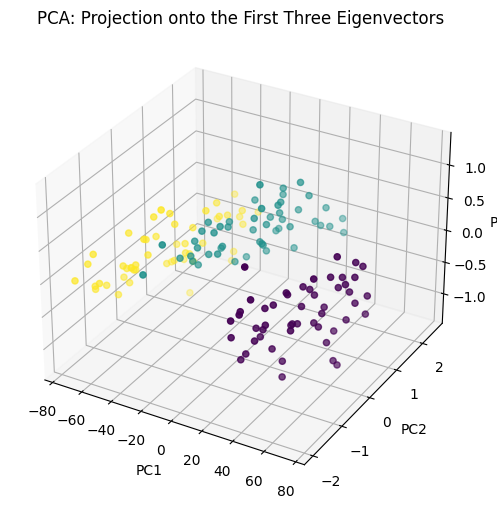

In [ ]:
# Extract the features and target variable from the dataset
X = data.drop('Species', axis=1).values
target = data['Species'].values

# Create an instance of the PCA class with n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the data
pca.fit(X)

# Plot the data projected onto the first three eigenvectors
pca.plot_data(X, target)



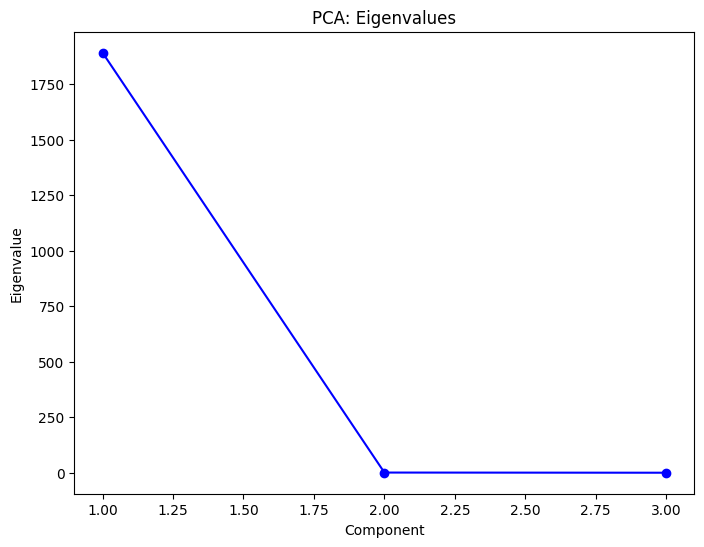

In [ ]:
# Plot the eigenvalues
pca.plot_eigenvalues()